# Challenge 6 - Classification Error

Classification Error Metric Challenges  
Ozzie Liu  
2/14/2016

In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn.cross_validation import cross_val_score

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

### Loading the Data
Loading the same data file, and using same random state and parameters, I make the same classifiers as challenge 5

In [2]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']

house_votes = pd.read_csv("../05-Classification/house-votes-84.data", names=column_names)
house_votes.replace(to_replace=['y', 'n', '?', 'republican', 'democrat'], 
                    value=[1, 0, np.nan, 1, 0], inplace = True)
house_votes = house_votes.fillna(house_votes.mean())

X = house_votes.drop(['party'], 1)
y = house_votes.party

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [4]:
house_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,1,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,1,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,0,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,0,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,0,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


### Calculate Accuracy, Precision, Recall, and F1

In [5]:
models = [KNeighborsClassifier(6), 
          LogisticRegression(),
          GaussianNB(),
          SVC(probability=True),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

model_names = ['KNN', 'Logistic', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']

In [6]:
accuracy = []
precision_rep = []
precision_dem = []
recall_rep = []
recall_dem = []
f1_rep = []
f1_dem = []

## Go through the models and find the scores
for model in models:
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    
    accuracy.append( accuracy_score(y_test, y_hat) )
    precision_rep.append( precision_score(y_test, y_hat, pos_label=1) )
    precision_dem.append( precision_score(y_test, y_hat, pos_label=0) )
    recall_rep.append( recall_score(y_test, y_hat, pos_label=1))
    recall_dem.append( recall_score(y_test, y_hat, pos_label=0))
    f1_rep.append( f1_score(y_test, y_hat, pos_label=1) )
    f1_dem.append( f1_score(y_test, y_hat, pos_label=0) )

accuracy_df = pd.DataFrame({'accuracy':accuracy, 'precision-rep':precision_rep, 'precision-dem':precision_dem,
                            'recall-rep':recall_rep, 'recall-dem':recall_dem, 'f1-rep':f1_rep, 'f1-dem':f1_dem})
accuracy_df.set_index([model_names])

,accuracy,f1-dem,f1-rep,precision-dem,precision-rep,recall-dem,recall-rep
KNN,0.931298,0.942675,0.914286,0.925000,0.941176,0.961039,0.888889
Logistic,0.938931,0.949367,0.923077,0.925926,0.960000,0.974026,0.888889
Naive Bayes,0.938931,0.950000,0.921569,0.915663,0.979167,0.987013,0.870370
SVM,0.954198,0.961538,0.943396,0.949367,0.961538,0.974026,0.925926
Decision Tree,0.954198,0.961538,0.943396,0.949367,0.961538,0.974026,0.925926
Random Forest,0.961832,0.968153,0.952381,0.950000,0.980392,0.987013,0.925926


## Challenge 2

For each, draw the ROC curve and calculate the AUC.

In [7]:
## Transform republican/democrat to 1/0
y_test = np.array(y_test)

In [8]:
## Calc and store each ROC and AUC
fpr_list = []
tpr_list = []
auc_list = []
for model in models:
    y_hat_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_hat_prob)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc(fpr, tpr))

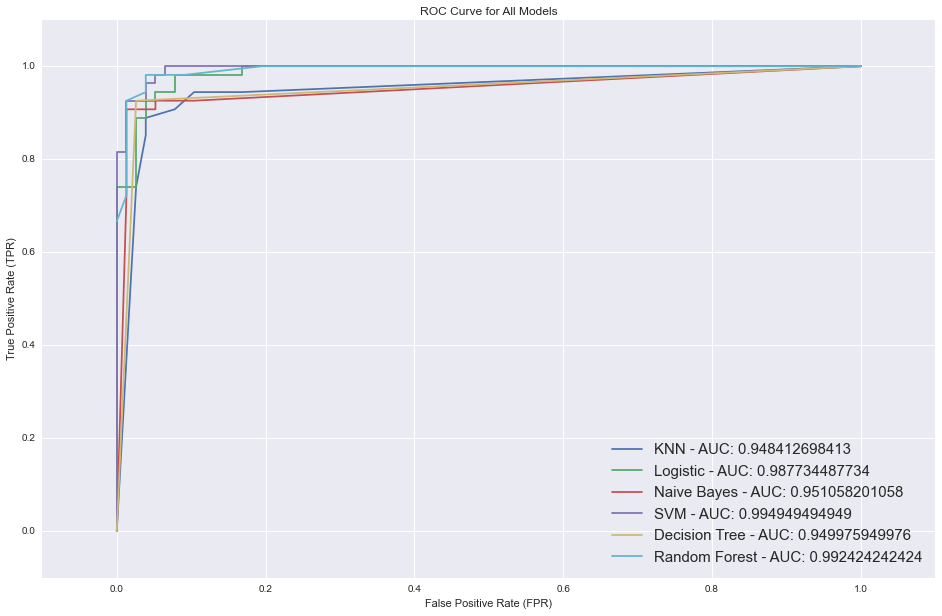

In [9]:
## Plot them all on 1 graph
plt.figure(figsize=(16,10))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label = model_names[i] + ' - AUC: ' + str(auc_list[i]))
plt.legend(loc = 0, fontsize = 15)

## Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [10]:
cf_score_df = pd.DataFrame()

for score_type in ['accuracy', 'recall', 'precision', 'f1']:
    score_list = []
    for model in models:
        score_list.append(np.mean(cross_val_score(model, X, y, scoring=score_type)))
    cf_score_df[score_type] = score_list

cf_score_df.set_index([model_names])

,accuracy,recall,precision,f1
KNN,0.933333,0.934524,0.897096,0.915323
Logistic,0.960920,0.952381,0.949399,0.950059
Naive Bayes,0.931034,0.916667,0.908613,0.911185
SVM,0.954023,0.964286,0.922271,0.942184
Decision Tree,0.944828,0.958333,0.930105,0.932353
Random Forest,0.963218,0.970238,0.948682,0.970019


## Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [11]:
movies = pd.read_csv("../03-Linear-Regression/2013_movies.csv")
movies = movies.dropna()
X_movies = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y_movies = movies.Rating

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_movies, y_movies, test_size = 0.3, random_state = 4444)

In [12]:
knn_movies = KNeighborsClassifier(5)
knn_movies.fit(X_m_train, y_m_train)
knn_m_prediction = knn_movies.predict(X_m_test)

print 'Precision for R, PG-13, PG:', precision_score(y_m_test, knn_m_prediction, average = None)
print 'Recall for R, PG-13, PG:', recall_score(y_m_test, knn_m_prediction, average = None)

Precision for R, PG-13, PG: [ 0.          0.5         0.66666667]
Recall for R, PG-13, PG: [ 0.          0.63636364  0.72727273]


In [17]:
log_movies = LogisticRegression()
log_movies.fit(X_m_train, y_m_train)
log_m_prediction = log_movies.predict(X_m_test)

print 'Precision for R, PG-13, PG:', precision_score(y_m_test, log_m_prediction, average = None)
print 'Recall for R, PG-13, PG:', recall_score(y_m_test, log_m_prediction, average = None)

Precision for R, PG-13, PG: [ 0.          0.40909091  0.6       ]
Recall for R, PG-13, PG: [ 0.          0.81818182  0.27272727]


## Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [14]:
survival = pd.read_csv('../05-Classification/haberman.data', names = ['age', 'year', 'nodes', 'survival'])

In [15]:
## Use logistic regression to predict survival 5+ years
y_survival = survival.survival
X_survival = survival.drop(['survival'], 1)

X_train, X_test, y_train, y_test = train_test_split(X_survival, y_survival, test_size = 0.3, random_state = 4444)

survival_logreg = LogisticRegression()
survival_logreg.fit(X_train, y_train)

y_survival_prob = survival_logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_survival_prob, pos_label = 2)

AUC: 0.647522522523


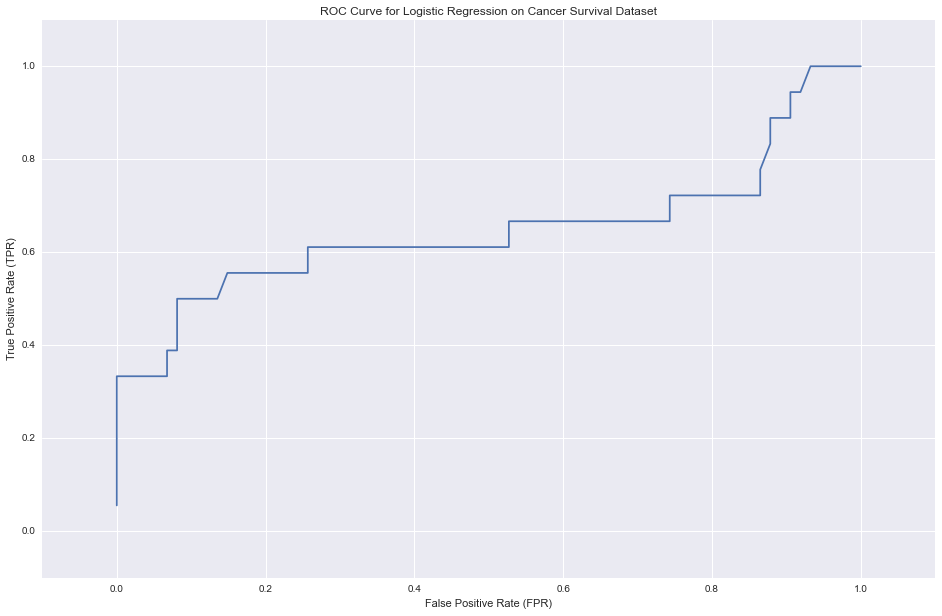

In [16]:
## Plot ROC and calculate the AUC
plt.figure(figsize=(16,10))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.title('ROC Curve for Logistic Regression on Cancer Survival Dataset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.plot(fpr, tpr)
print 'AUC:', auc(fpr, tpr)